In [1]:
# Importing required modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading Data
data = pd.read_csv("ObesityDataSet.csv")
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
# Checking the shape of Dataset
data.shape

(2111, 17)

In [18]:
data["TUE"].unique()

array([1.      , 0.      , 2.      , ..., 0.646288, 0.586035, 0.714137])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [6]:
# Checking for null values
data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [7]:
#Drop duplicates rows & keeping the last row having duplicated values
data.drop_duplicates(keep='last',inplace=True)

In [8]:
# Separating Numerical Columns & Categorical Columns
cat_col=[]
num_col=[]
for i in data.columns:
    if data[i].dtype=='O':
        cat_col.append(i)
    else:
        num_col.append(i)

In [9]:
cat_col

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [10]:
num_col

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [11]:
# Checking for Unique Values of all the Categorical Columns
for cat in cat_col:
  print(cat)
  print(data[cat].unique())
  print("\n")

Gender
['Female' 'Male']


family_history_with_overweight
['yes' 'no']


FAVC
['no' 'yes']


CAEC
['Sometimes' 'Frequently' 'Always' 'no']


SMOKE
['no' 'yes']


SCC
['no' 'yes']


CALC
['no' 'Sometimes' 'Frequently' 'Always']


MTRANS
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']


NObeyesdad
['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']




#### Plotting Graphs 

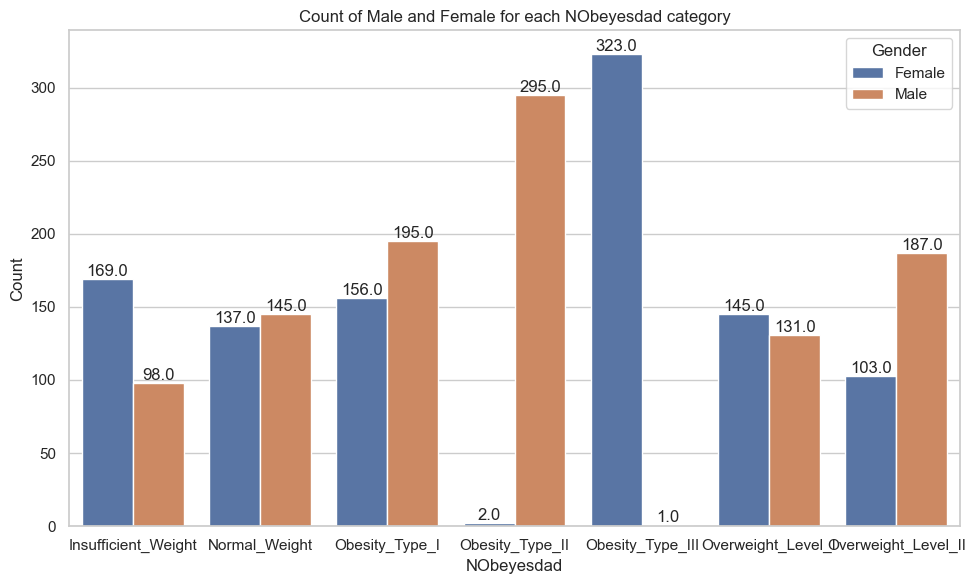

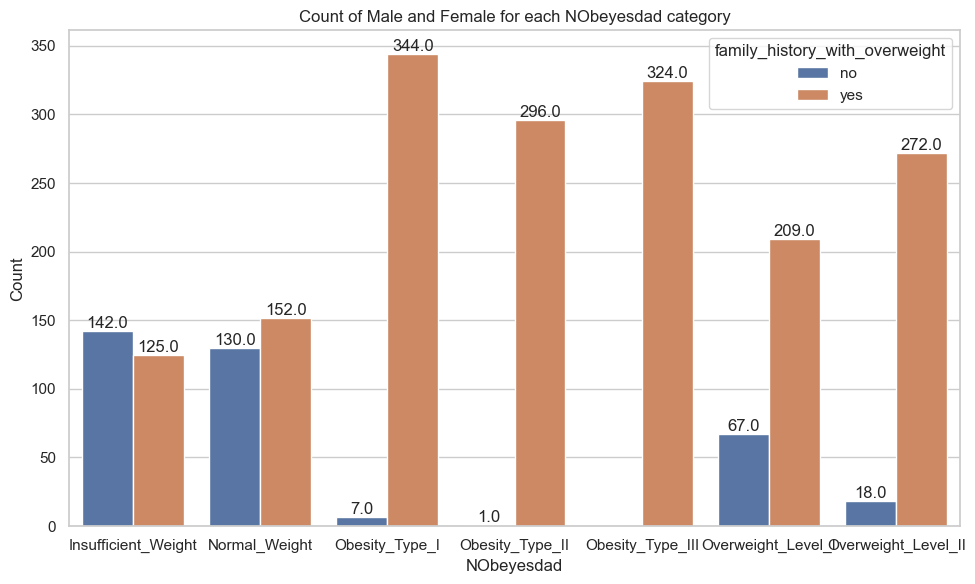

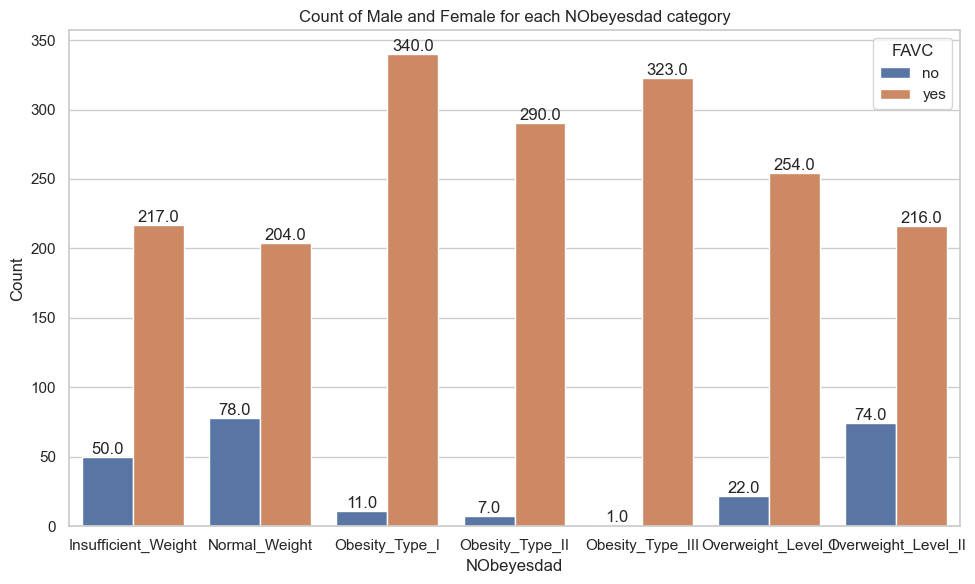

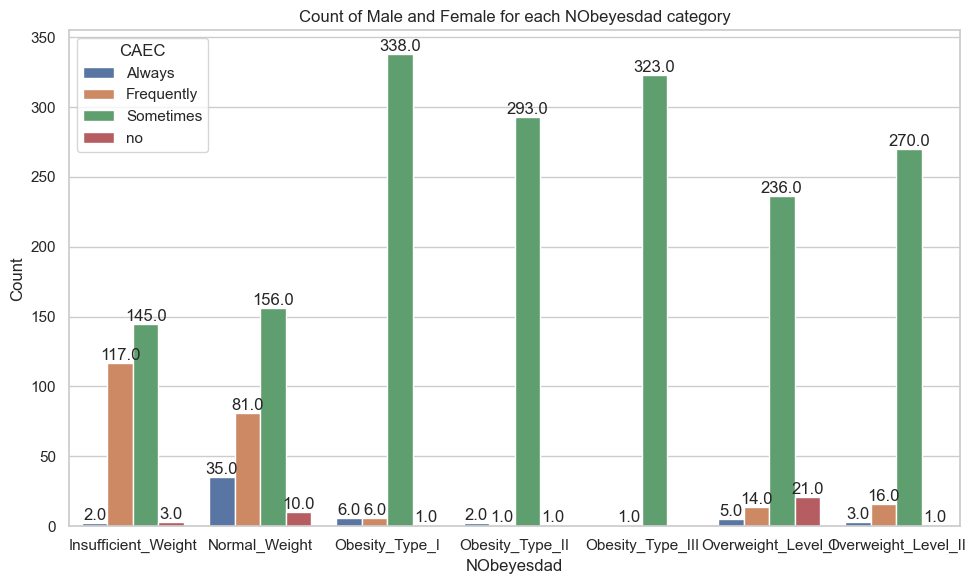

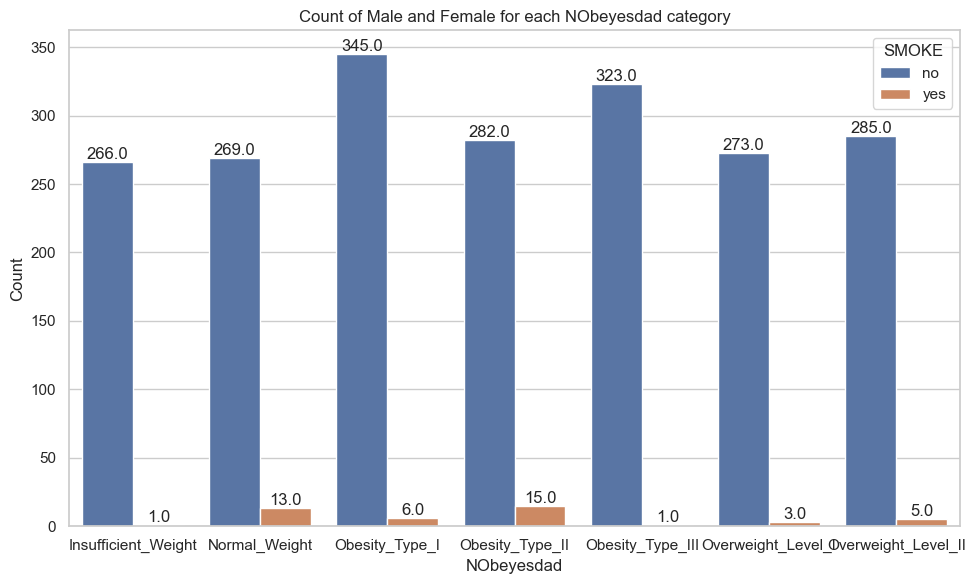

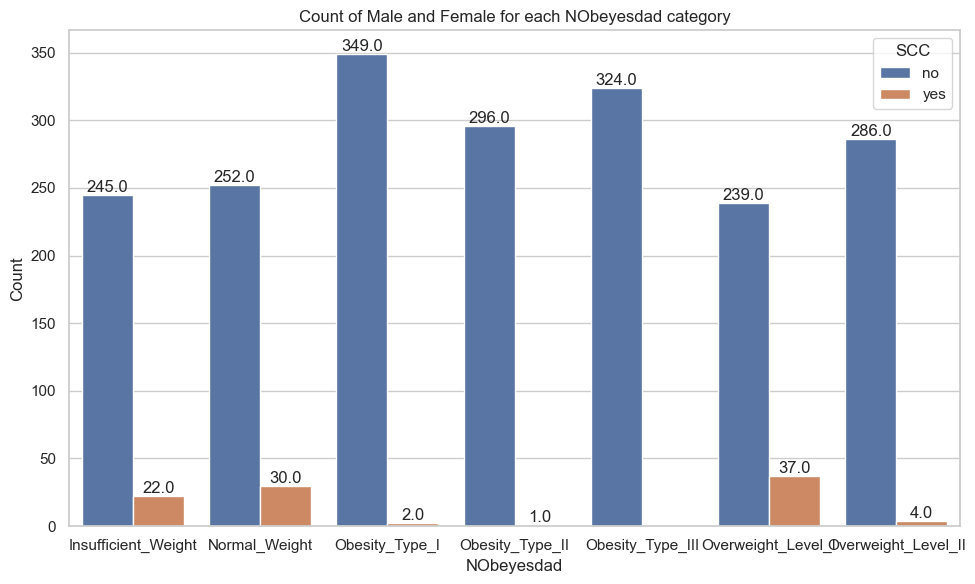

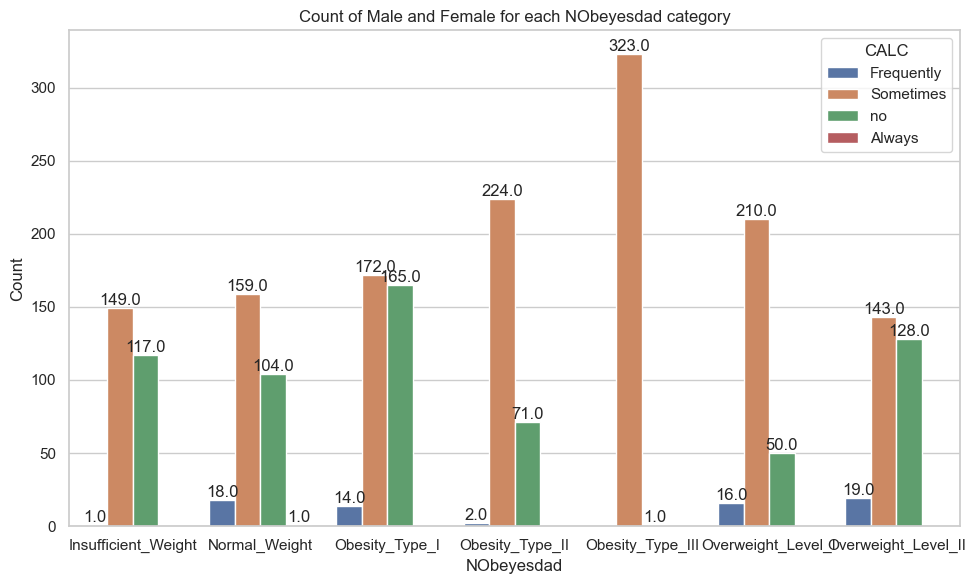

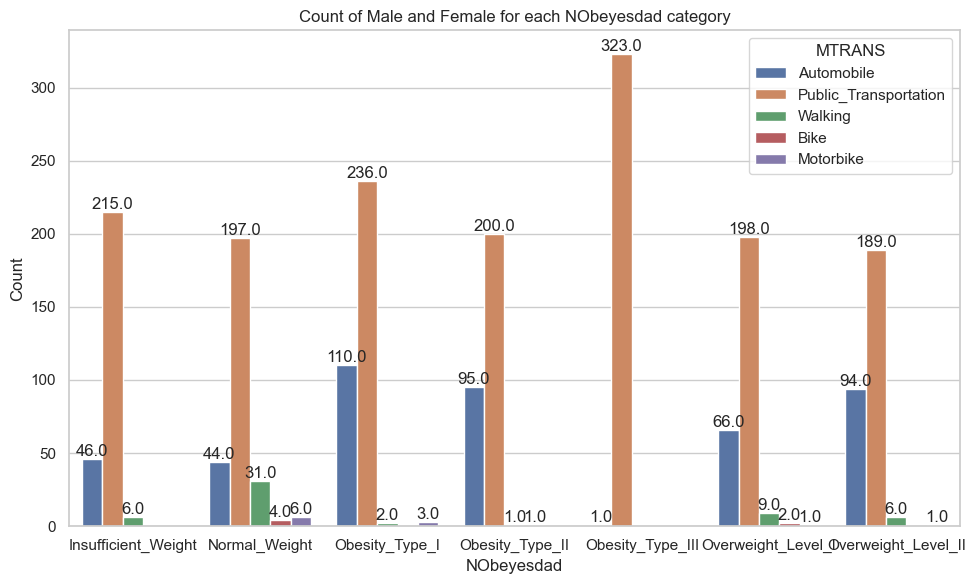

In [12]:
for i in cat_col[:-1]:
    # Group the data by 'NObeyesdad' and 'Gender' and get the count
    grouped_data = data.groupby(['NObeyesdad', i]).size().reset_index(name='Count')

    # Set the style of the plot
    sns.set(style="whitegrid")

    # Create the bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(data=grouped_data, x='NObeyesdad', y='Count', hue=i)

    # Add data labels to the bars
    for p in plt.gca().patches:
        plt.gca().annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

    # Set labels and title
    plt.xlabel('NObeyesdad')
    plt.ylabel('Count')
    plt.title('Count of Male and Female for each NObeyesdad category')

    # Show the legend
    plt.legend(title=i)

    # Adjust the layout
    plt.tight_layout()

    # Show the plot
    plt.show()

Insights:

    1. Most Male are suffering from Obesity_Type_II & Most Female are suffering from Obesity_Type_III.

    2. Most People are suffering from Obesity_Type_I who are having family history with Overweight.

    3. People with higher consumption of  High Calorific Food tends to suffer from Obesity_Type_I.

    4. People consuming food in between meals tends to suffer from Obesity_Type_I.

    5. Smoking does not impact weight.

    6. People not monitoring their calorific consumption tends to suffer from Obesity_Type_I.

    7. Increase in Alcohol consumption leads to increase in Obesity category.

    8. People who avoid walking tends to suffer from Obesity_Type_III.

In [13]:
# Encoding the categories with numeric values
data['Gender']=data['Gender'].map({'Male':1,'Female':0})
data['family_history_with_overweight']=data['family_history_with_overweight'].map({'yes':1,'no':0})
data['FAVC']=data['FAVC'].map({'yes':1,'no':0})
data['CAEC']=data['CAEC'].map({'no':0,'Sometimes':1,'Frequently':2,'Always':3})
data['SMOKE']=data['SMOKE'].map({'yes':1,'no':0})
data['SCC']=data['SCC'].map({'yes':1,'no':0})
data['CALC']=data['CALC'].map({'no':0,'Sometimes':1,'Frequently':2,'Always':3})
data['MTRANS']=data['MTRANS'].map({'Public_Transportation':1,'Walking':0,'Automobile':4,'Motorbike':3,'Bike':1})
data['NObeyesdad']=data['NObeyesdad'].map({'Normal_Weight':1,'Overweight_Level_I':2,'Overweight_Level_II':3,
 'Obesity_Type_I':4,'Insufficient_Weight':0,'Obesity_Type_II':5,
 'Obesity_Type_III':6})


<Axes: >

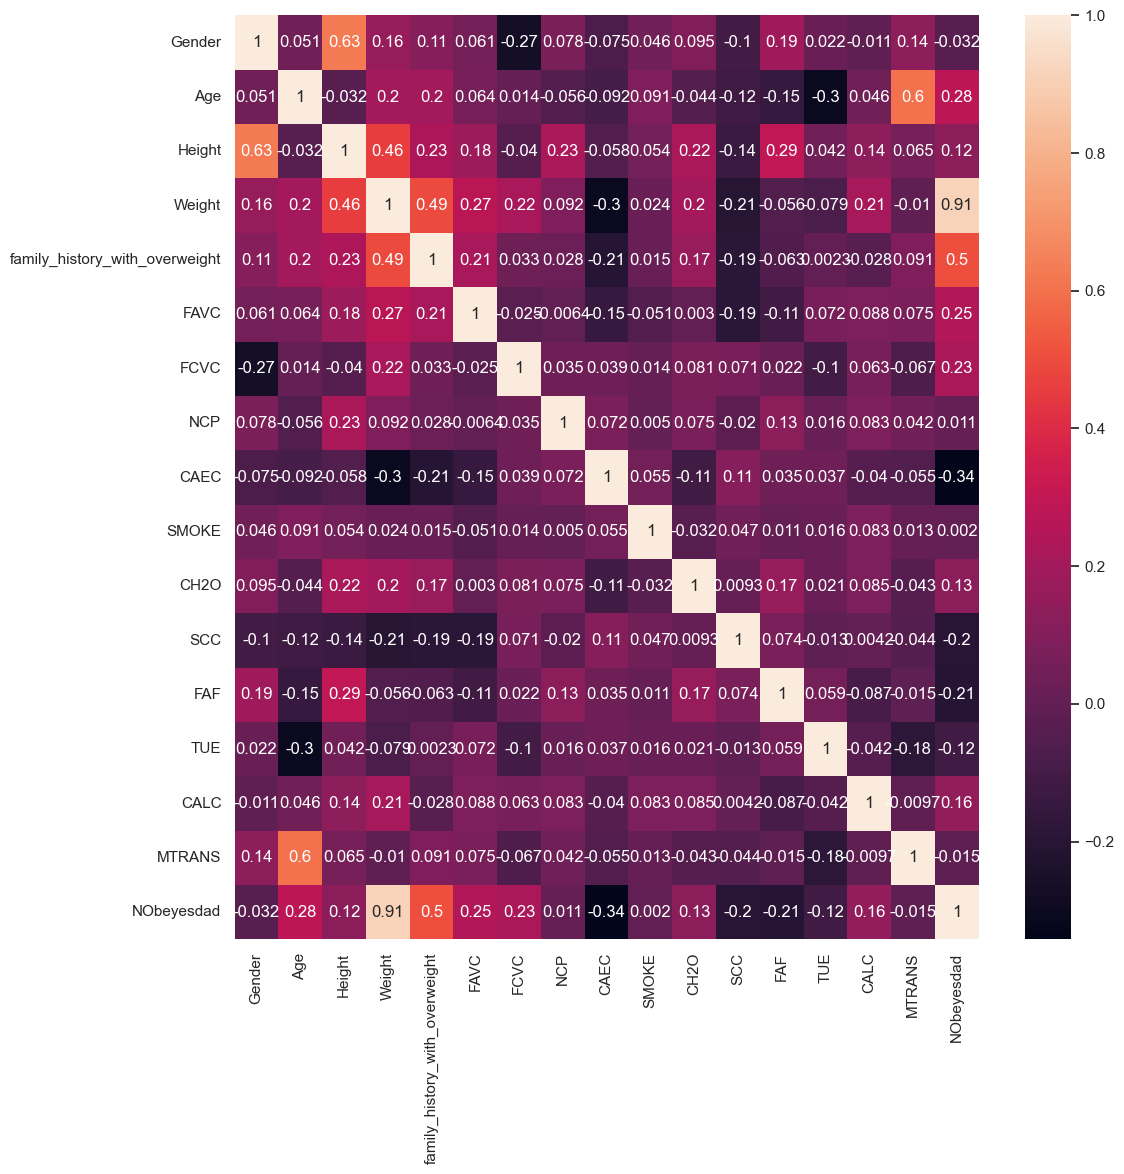

In [14]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True)

Insight:

From the heatmap it is clear that Weight is Positively correlated with Obesity category.